# Análise de Dados - Insurance Claim

Para a realização das análises usarei as seguintes bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A variável que conterá o DataFrame dos dados será chamada de **insurance**:

In [2]:
insurance = pd.read_csv('insurance_claim.csv')

Para adicionar um tema mais estético aos gráficos, usarei o tema padrão do Seaborn:

In [3]:
sns.set_theme()

Abaixo está um resumo dos dados incluidos no dataset usado:

In [4]:
insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,yes,after 2015,no,yes,New York,12000.0,sedan,0,0,0,approved
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no,before 2015,no,no,New York,16000.0,sedan,0,0,0,denied
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,yes,before 2015,no,no,New York,11000.0,sedan,0,0,0,approved
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,approved
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,yes,before 2015,no,no,Miami,12000.0,sedan,2,0,1,denied


O dataset contém 10.000 dados diferentes, usaremos as informações deles para fazer análises sobre as claims de seguros e também haverá análises socioeconômicas possíveis de se fazer com eles.

## Análise de features

Na análise de features irei analisar cada uma das variáveis do banco de dados (exceto as variáveis **outcome** e **ID**), refletindo a respeito de suas distribuições e correlações para tentar inferir teorias a respeito dos dados.

### Idade

Primeiramente, interessa-me saber qual é a faixa de idade em que mais ocorrem casos de pedidos de indenização, e para isso usarei o método <font color='skyblue'>filter()</font> para correlacionar os <font color='yellow'>ID's</font> com as <font color='yellow'>idades</font>, pois assim será possível contabilizar a quantidade de casos em que determinada faixa de idade aparece.

Em seguida, o método <font color='skyblue'>.groupby()</font> é usado para ordenar os dados pelas idades

Finalizando, o método <font color='skyblue'>.count()</font> é usado para contabilizar os dados relacionados ao groupby (as idades)

In [5]:
insurance.filter(['AGE', 'ID']).groupby('AGE').count()

,ID
AGE,
16-25,2016
26-39,3063
40-64,2931
65+,1990


Observando a tabela, percebemos que a faixa de idade em que mais ocorrem pedidos de indenização é por volta dos dos 26-39 anos. Mas vale notar também que a quantidade de casos é semelhante à faixa dos 40-64 anos, mostrando que eventuais danos ao veículo ocorrem mais tarde na vida do motorista. 

Algumas explicações possíveis são devido à vida-útil do automóvel (em casos de descuido da mecânica do veículo), estresse no trabalho do indivíduo... até mesmo crise de meia-idade (como por exemplo comprar carros luxuosos e sofrer um assalto), dentre outras explicações.

Para verificarmos se a suposição sobre a vida-útil do veículo, podemos fazer um gráfico contabilizando a quantidade de casos em que a data do carro é de antes/depois de 2015 ordenado pelas idades, como o gráfico abaixo:

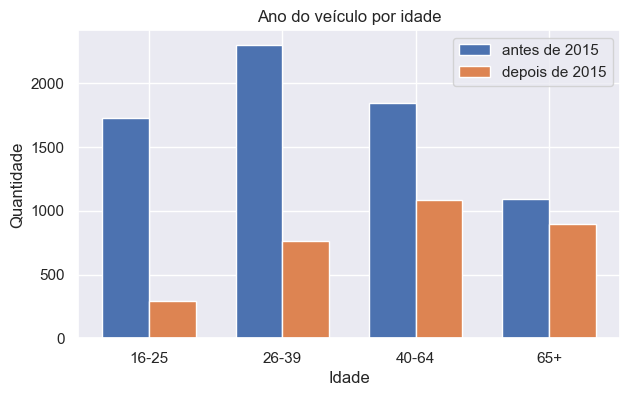

In [6]:
ages = insurance['AGE'].unique() #Recebe todos os tipos de idade
ages.sort() #Ordena os tipos de idade

before2015 = insurance[insurance['VEHICLE_YEAR'] == "before 2015"].groupby('AGE').count()['ID'] #Conta a quantidade de veículos antes de 2015 por idade
after2015 = insurance[insurance['VEHICLE_YEAR'] == "after 2015"].groupby('AGE').count()['ID'] #Conta a quantidade de veículos depois de 2015 por idade

values = np.arange(len(ages)) #Cria um array com o tamanho do array de idades
width = 0.35 #Largura das barras

plt.figure(figsize=(7,4)) #Define o tamanho da figura
plt.bar(values, before2015, width, label='antes de 2015') #Cria a barra relacionada aos dados de antes de 2015
plt.bar(values + width, after2015, width, label='depois de 2015') #Cria a barra relacionada aos dados de depois de 2015

plt.title("Ano do veículo por idade") #Define o título do gráfico
plt.ylabel('Quantidade') #Define o título do eixo y
plt.xlabel('Idade') #Define o título do eixo x
plt.xticks(values + width / 2, ages) #Define o posicionamento dos valores do eixo x
plt.legend() #Adiciona a legenda
plt.show() #Mostra o gráfico

Podemos confirmar então que a vida-útil do veículo é relevante para o número de acidentes, visto que a faixa-etária que tinha mais pedidos de indenização (26-39) é a que mais possui veículos com ano antes de 2015.

Um fato a ser observado também é que a faixa em que ocorrem menos pedidos de indenização é de 65 anos pra cima, que é a idade da aposentadoria do indivíduo, indicando que pessoas mais velhas tendem a dirigir menos, talvez devido ao agravamento de doenças que dificultem a atividade, como por exemplo a síndrome de Parkinson.

#### Relação Estado Civil x Idade

Uma análise interessante para se fazer é sobre a relação de idade/casamentos, podemos ver no gráfico abaixo que a faixa de idade em que há mais pessoas casadas é dos 40-64 anos. Porém, ao chegar na numa faixa etária maior, há menos pessoas casadas, o que significa que casais se tornaram viúvos :(.

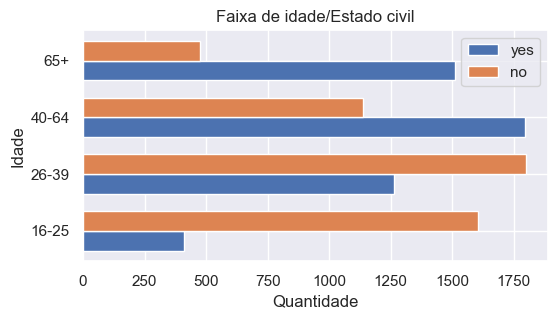

In [7]:
married = insurance[insurance['MARRIED'] == 'yes'].groupby('AGE').count()['ID']
notmarried = insurance[insurance['MARRIED'] == 'no'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 0.35

plt.figure(figsize=(6,3))
plt.barh(values, married, width, label='yes') #Cria a barra horizontal relacionada aos dados de pessoas casadas
plt.barh(values + width, notmarried, width, label='no') #Cria a barra horizontal relacionada aos dados de pessoas não casadas

plt.title("Faixa de idade/Estado civil")
plt.xlabel('Quantidade')
plt.ylabel('Idade')
plt.yticks(values + width / 2, ages)
plt.legend()
plt.show()

#### Relação Idade x Renda

Por termos de curiosidade podemos ver também a relação entre a <font color=yellow>idade</font> dos indivíduos e suas <font color=yellow>rendas</font>:

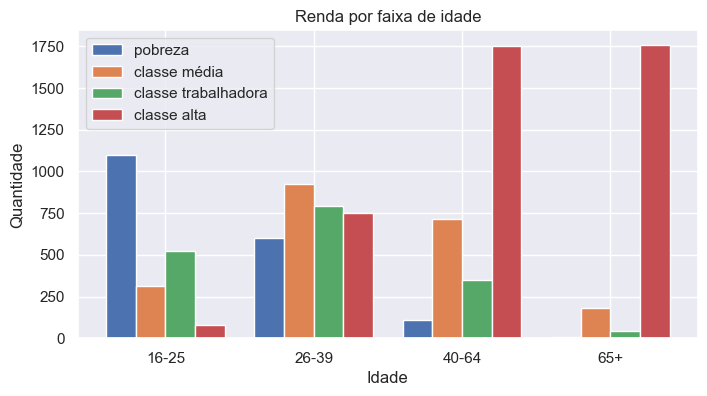

In [8]:
income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('AGE').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('AGE').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('AGE').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 1/5

plt.figure(figsize=(8,4))
plt.bar(values, income1, width, label='pobreza')
plt.bar(values + width, income2, width, label='classe média')
plt.bar(values + 2*width, income3, width, label='classe trabalhadora')
plt.bar(values + 3*width, income4, width, label='classe alta')

plt.title("Renda por faixa de idade")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.xticks(values + 3*width/2, ages)
plt.legend()
plt.show()


O gráfico acima mostra a quantidade de casos relacionados ao tipo de renda agrupado pelas faixas-etárias.

Como podemos ver no gráfico de linhas acima, a idade em que apresenta mais pessoas com a classe alta é dos 40 anos pra cima, junto também com os menores casos de pobreza. Isso pode-se dar devido ao sucesso na vida profissional dos indivíduos e também à aposentadoria.

#### Relação Idade x Tipo de Carro

Podemos também analisar quais são os gostos preferenciais quanto ao <font color=yellow>tipo de carro</font> dos indivíduos pela <font color=yellow>idade</font>:

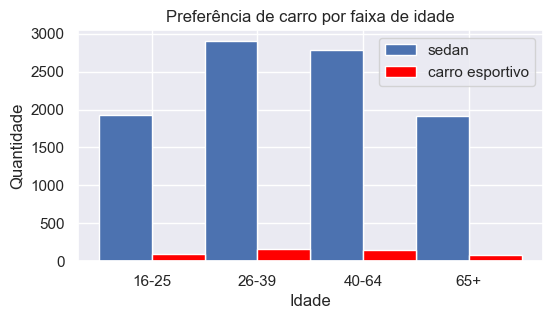

In [9]:
car1 = insurance[insurance['VEHICLE_TYPE'] == 'sedan'].groupby('AGE').count()['ID']
car2 = insurance[insurance['VEHICLE_TYPE'] == 'sports car'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 0.5

plt.figure(figsize=(6,3))
plt.bar(values, car1, width, label='sedan')
plt.bar(values + width, car2, width, label='carro esportivo', color='red')

plt.title("Preferência de carro por faixa de idade")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.xticks(values + width/2, ages)
plt.legend()
plt.show()

A escolha por um Sedan é a escolha majoritária entre os indivíduos, tanto por ser um carro de baixo custo e popular entre as pessoas, como diz uma notícia do Uol feita em 2021: <a href="https://www.uol.com.br/carros/noticias/redacao/2021/06/23/por-que-carros-populares-nos-eua-viram-modelos-de-luxo-no-brasil.htm">Por que carros 'populares' nos EUA viram modelos de luxo no Brasil</a>.

A compra de um carro esportivo se dá mais preferencialmente na meia-idade, onde inclusive acontece a famosa "Crise de meia-idade", momento em que pessoas adquirem frustração e ansiedade pelo pensamento de não ter aproveitado a vida o suficiente. 

#### Relação Idade x DUIS

O crime DUI, Driving Under the Influence (em português "Dirigir sob influência"), é o crime cometido quando se dirige sob influência alcóolica ou de drogas.  Os estatutos variam de acordo com cada estado norte-americano, porém a variação do nível o qual uma pessoa pode dirigir em segurança ou não é de 0,08 a 0,10 gramas de álcool.

No nosso dataset temos a variável referente ao número de infrações cometidas pelo segurado por embriaguez ao volante, vamos analisar em qual idade mais ocorre esse crime:

<Axes: xlabel='AGE'>

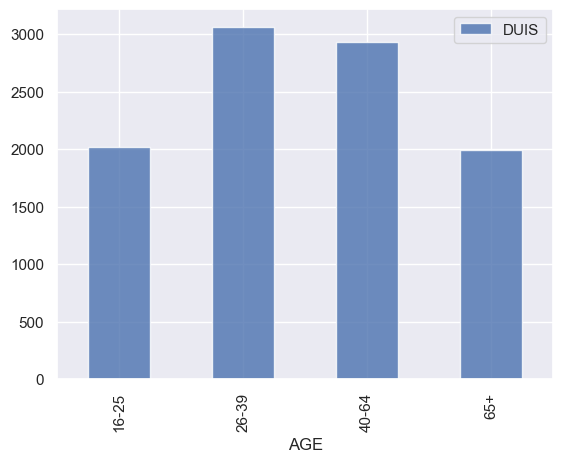

In [10]:
insurance.filter(['AGE', 'DUIS']).groupby('AGE').count().plot(kind='bar', alpha=0.8, grid=True)

Analisando a tabela vemos que as faixas-etárias de 26-39 e 40-64 são as que mais acumularam DUIS, e as faixas de pessoas jovens e idosas ficam bem equiparadas.

Para fazermos uma comparação entre as quantidades, podemos usar os dados da tabela abaixo e fazer uma proporção da **DUIS cometidas pela faixa-etária 26-39** pelas **DUIS cometidas pela faixa-etária 16-25**:

In [11]:
insurance.filter(['AGE', 'DUIS']).groupby('AGE').count()

,DUIS
AGE,
16-25,2016
26-39,3063
40-64,2931
65+,1990


In [12]:
k = 100*(3063/2016)
print("A proporção é: " + str(round(k,2)) + "%")

A proporção é: 151.93%


Ou seja, os adultos de 26-39 anos bebem 51.93% mais do que os jovens de 16-25. E essa quantidade de DUIS revela o descuido por parte dos adultos com bebidas álcoolicas ao dirigir.

### Gênero

Para verificar a variabilidade de dados em relação ao gênero, irei usar o mesmo método utilizado na análise das <font color=yellow>idades</fonts>:

In [13]:
insurance.filter(['GENDER', 'ID']).groupby('GENDER').count()

,ID
GENDER,
female,5010
male,4990


Podemos verificar que os dados estão igualitariamente distribuidos entre os <font color=yellow>gêneros</font>, portanto não é possível inferirmos alguma afirmação quanto a esses dados individualmente. 

#### Relação Gênero x Renda

Outra análise socioeconômica possível de se fazer é a relação do <font color=yellow>gênero</font> com a <font color=yellow>renda</font>:

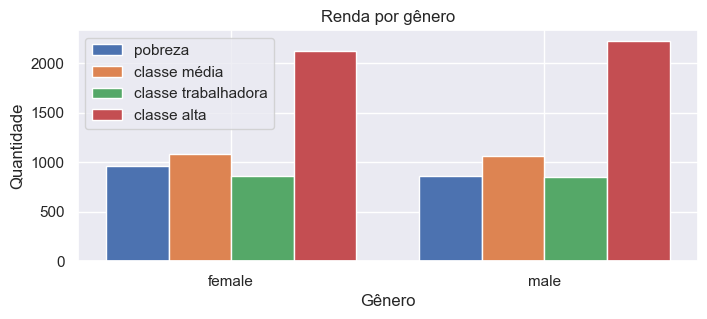

In [14]:
genders = insurance['GENDER'].unique()
genders.sort()

income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('GENDER').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('GENDER').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('GENDER').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('GENDER').count()['ID']

values = np.arange(len(genders))
width = 1/5

plt.figure(figsize=(8,3))
plt.bar(values, income1, width, label='pobreza')
plt.bar(values + width, income2, width, label='classe média')
plt.bar(values + (2*width), income3, width, label='classe trabalhadora')
plt.bar(values + (3*width), income4, width, label='classe alta')

plt.title("Renda por gênero")
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(values + 3*width/2, genders)
plt.legend()
plt.show()


Neste gráfico, onde as pessoas identificadas como do gênero feminino estão à esquerda e as do gênero masculino à direita, é possível notar uma diferença em relação à classe alta e a pobreza entre os gêneros, onde existem mais homens na classe alta do que mulheres e, ao mesmo tempo, existem mais mulheres em situação de pobreza do que homens na mesma.

#### Relação Gênero x Acidentes Passados

Nessa relação vamos investigar qual <font color=yellow>gênero</font> possui mais histórico de <font color=yellow>acidentes passados</font>:

Para isso usarei o método <font color='skyblue'>histplot()</font> para contabilizar a quantidade de acidentes passados de acordo com o gênero:

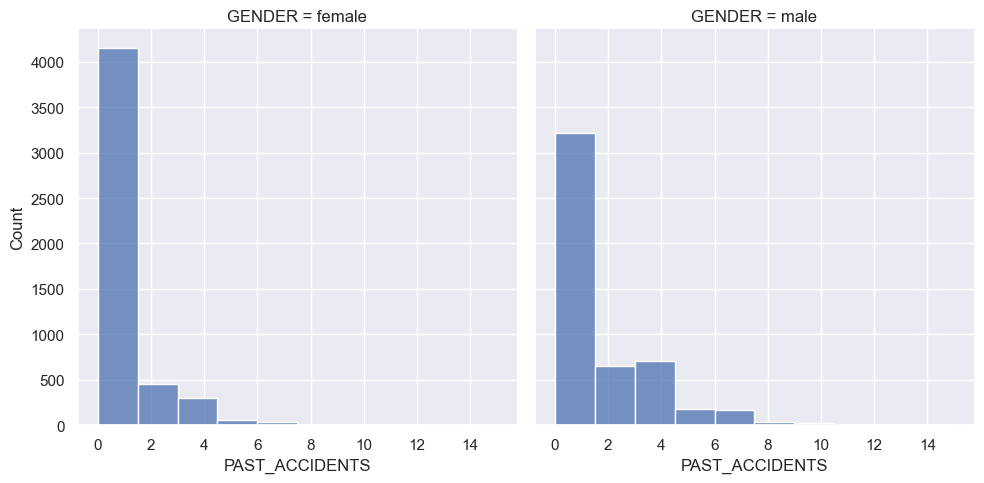

In [15]:
g = sns.FacetGrid(insurance, col='GENDER', height=5) ##O FacetGrid serve para criarmos múltiplos gráficos, um ao lado do outro
g.map(sns.histplot, 'PAST_ACCIDENTS', binwidth=1.5, bins=20) ##O map serve para aplicarmos uma função em cada um dos gráficos

O primeiro gráfico representa os acidentes passados dos indivíduos declarados como mulheres e o segundo dos declarados como homens. É notória a diferença entre as precauções no transito em relação aos gêneros. Enquanto as mulheres possuem raros casos de até 6 acidentes passados, os homens chegam a até 10 acidentes. Mostrando que os homens são mais descuidados ao dirigir.

### Etnia

Na análise das etnias o gráfico mostrará a diferença de distribuição entre a etnia majoritária e a etnia minoritária:

,ID
RACE,
majority,9012
minority,988


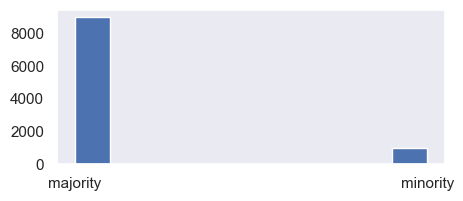

In [16]:
insurance['RACE'].hist(grid=False, figsize=(5, 2)) #O grid serve para mostrar ou não as linhas de grade no gráfico
insurance.filter(['RACE', 'ID']).groupby('RACE').count()

Vendo tanto pelo gráfico pela tabela, podemos notar que a etnia majoritária aparece cerca de 9 vezes mais do que a minoritária.

#### Relação Etnia x Educação

Uma análise socioeconômica possível de se realizar é a relação entre a <font color=yellow>etnia</font> e a <font color=yellow>educação</font> dos indivíduos, para termos uma ideia se a etnia é um fator relevante quanto ao ensino do cidadão. O gráfico abaixo mostra a quantidade de ensinos registrados em cada etnia:

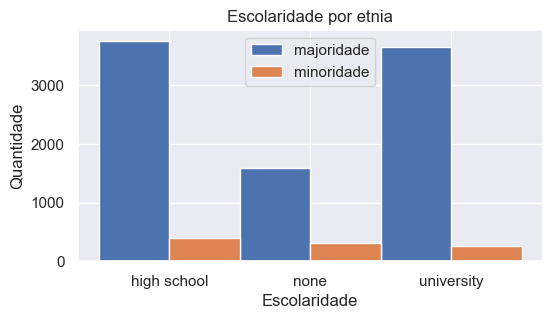

In [17]:
education = insurance['EDUCATION'].unique()

raceMajor = insurance[insurance['RACE'] == 'majority'].groupby('EDUCATION').count()['ID']
raceMinor = insurance[insurance['RACE'] == 'minority'].groupby('EDUCATION').count()['ID']

values = np.arange(len(education))
width = 0.5

plt.figure(figsize=(6,3))
plt.bar(values, raceMajor, width, label='majoridade')
plt.bar(values + width, raceMinor, width, label='minoridade')

plt.title("Escolaridade por etnia")
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(values + width/2, education)
plt.legend()
plt.show()


Porém não é efetivo compararmos as quantidades das duas etnias, dado que uma possui bem mais registros do que a outra. Portanto, usarei proporções para dizer o percentual de escolaridade de cada etnia, a começar pelo **grupo majoritário**:

In [18]:
print(insurance[insurance['RACE'] == 'majority'].groupby('EDUCATION').count()['ID'])

EDUCATION
high school    3755
none           1596
university     3661
Name: ID, dtype: int64


Vemos que nesse grupo 1596 pessoas não possuem escolaridade, 3755 possuem ensino médio completo e 3661 possuem graduação numa universidade. Usaremos esses dados na fórmula da proporção, que será dada por:

$$N_{i}/N_{total}$$
**Onde:** 

$N_{i}$ = quantidade de pessoas com escolaridade $i$; 

$N_{total}$ = quantidade de pessoas total do grupo

*OBS:* o resultado será arredondado para até duas casas decimais, para uma visualização mais estética dos resultados.

In [19]:
num = 9012 #número de pessoas da raça majoritária
print("Proporção de alunos de raça majoritária sem ensino: " + str(round(100*(1596/num),2)) + "%")
print("Proporção de alunos de raça majoritária com ensino médio completo: " + str(round(100*(3755/num),2)) + "%")
print("Proporção de alunos de raça majoritária com universidade completa: " + str(round(100*(3661/num),2)) + "%")

Proporção de alunos de raça majoritária sem ensino: 17.71%
Proporção de alunos de raça majoritária com ensino médio completo: 41.67%
Proporção de alunos de raça majoritária com universidade completa: 40.62%


Vemos que cerca de 82,29% (41,67% + 40,62%) dos indivíduos de raça majoritária possuem pelo menos uma escolaridade.

Agora partiremos para as proporções do **grupo minoritário**:

In [20]:
print(insurance[insurance['RACE'] == 'minority'].groupby('EDUCATION').count()['ID'])

EDUCATION
high school    402
none           319
university     267
Name: ID, dtype: int64


In [21]:
num = 988
print("Proporção de alunos de raça minoritária sem ensino: " + str(round(100*(319/num),2)) + "%")
print("Proporção de alunos de raça minoritária com ensino médio completo: " + str(round(100*(402/num),2)) + "%")
print("Proporção de alunos de raça minoritária com universidade completo: " + str(round(100*(267/num),2)) + "%")

Proporção de alunos de raça minoritária sem ensino: 32.29%
Proporção de alunos de raça minoritária com ensino médio completo: 40.69%
Proporção de alunos de raça minoritária com universidade completo: 27.02%


Vemos que cerca de 67,71% (40,69% + 27,02%) dos indivíduos de raça minoritária possuem pelo menos uma escolaridade.

Podemos observar então que a etnia é realmente um fator relevante no fator da escolaridade, dado que o grupo da raça minoritária obteve uma proporção menor em relação ao outro grupo.

### Experiência em dirigir

Ao analisarmos a quantidade de pedidos de indenização pela experiência em dirigir do motorista, logicamente e visualmente poderemos observar que conforme o indivíduo tem mais experiência, menos acidentes acontecem. Como mostra o gráfico abaixo:

<Axes: title={'center': 'Quantidade de cada experiência de condução'}, xlabel='Experiência de condução', ylabel='Quantidade'>

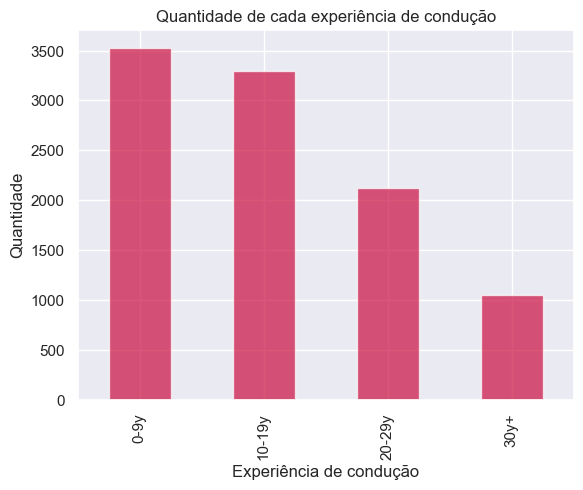

In [22]:
accidents = insurance.filter(['DRIVING_EXPERIENCE', 'ID']).groupby('DRIVING_EXPERIENCE').count()['ID']
accidents.plot(kind='bar', color='#cb0e40', alpha=0.7, grid=True, xlabel='Experiência de condução', ylabel='Quantidade', title='Quantidade de cada experiência de condução')

### Escolaridade

Agora iremos analisar o fator da escolaridade no nosso dataset, vamos começar com a quantidade de indivíduos que possuem cada tipo de escolaridade:

Text(0.5, 1.0, 'Histograma da educação')

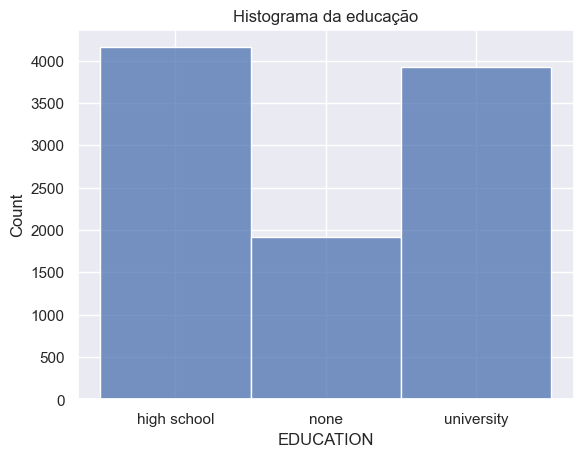

In [23]:
sns.histplot(insurance, x='EDUCATION').set_title('Histograma da educação')

Podemos ver que a maioria dos indivíduos possuem ensino médio completo, seguido de ensino superior completo e por último, ensino médio incompleto. Isso acontece porque para obter uma carteira de motorista é necessário ser alfabetizado, e pessoas que não possuem a escolaridade completa têm mais dificuldade quanto ao aprendizado da leitura e escrita.

#### Relação Escolaridade x Renda x Posse de Veículo

Nesta relação iremos analisar se os fatores escolaridade, renda e posse de veículo estão relacionados entre si. Para isso, organizaremos os dados pela escolaridade, contaremos o número de casos de cada renda (linhas) e contaremos o número de casos de se o indivíduo é proprietário do veículo (barras): 

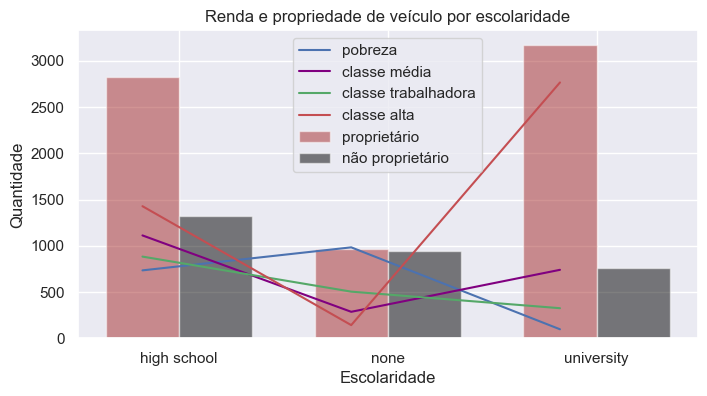

In [24]:
education = insurance['EDUCATION'].unique()

income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('EDUCATION').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('EDUCATION').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('EDUCATION').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('EDUCATION').count()['ID']

yesOwner = insurance[insurance['VEHICLE_OWNERSHIP'] == 'yes'].groupby('EDUCATION').count()['ID']
noOwner = insurance[insurance['VEHICLE_OWNERSHIP'] == 'no'].groupby('EDUCATION').count()['ID']

values = np.arange(len(education))
width = 0.35

plt.figure(figsize=(8,4))
plt.plot(values, income1, color='b', label='pobreza')
plt.plot(values, income2, color='purple', label='classe média')
plt.plot(values, income3, color='g', label='classe trabalhadora')
plt.plot(values, income4, color='r', label='classe alta')

plt.bar(values, yesOwner, width, alpha=0.5, color='brown', label='proprietário')
plt.bar(values + width, noOwner, width, alpha=0.5, color='black', label='não proprietário')

plt.title("Renda e propriedade de veículo por escolaridade")
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(values + width/2, education)
plt.legend()
plt.show()

Podemos ver que a relação entre a renda e a propriedade do veículo é diretamente proporcional, ou seja, quanto maior a renda, maior a probabilidade de o indivíduo possuir um veículo, e vice-versa. Podemos notar isso analisando que o caso em que há mais pobreza (quando a escolaridade é incompleta) é o caso em que há menos propriedade de veículo.

Ademais, pessoas com universidade completa são características por terem o maior índice de classe alta, e também possuem o maior índice de propriedade de veículo. O contrário também vale: pessoas com nenhuma escolaridade são características por terem o maior índice de pobreza.

### Renda

Quando analisamos o histograma da renda dos indivíduos, podemos descobrir qual é a renda que mais teve pedidos de indenização:

Text(0.5, 1.0, 'Histograma da renda')

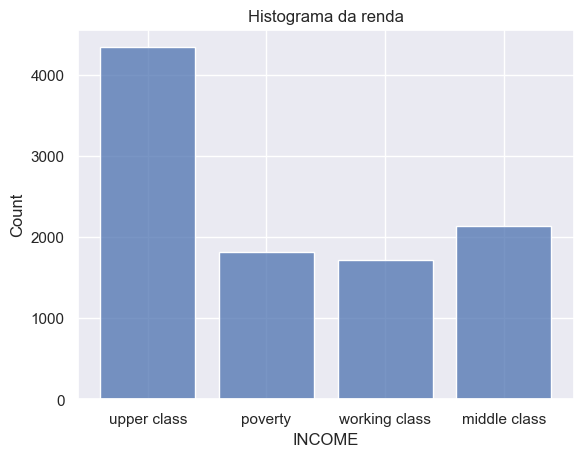

In [25]:
sns.histplot(insurance, x='INCOME', shrink=0.8).set_title('Histograma da renda')

Nesse caso, as pessoas com a renda de classe alta foram as que mais pediram indenização. Isso pode ser explicado pelo fato de que pessoas com renda alta possuírem mais condições de pagar pelo seguro do veículo.

#### Relação Renda x Pontos de crédito

Vamos analisar agora a relação entre a renda e os pontos de crédito do indivíduo:

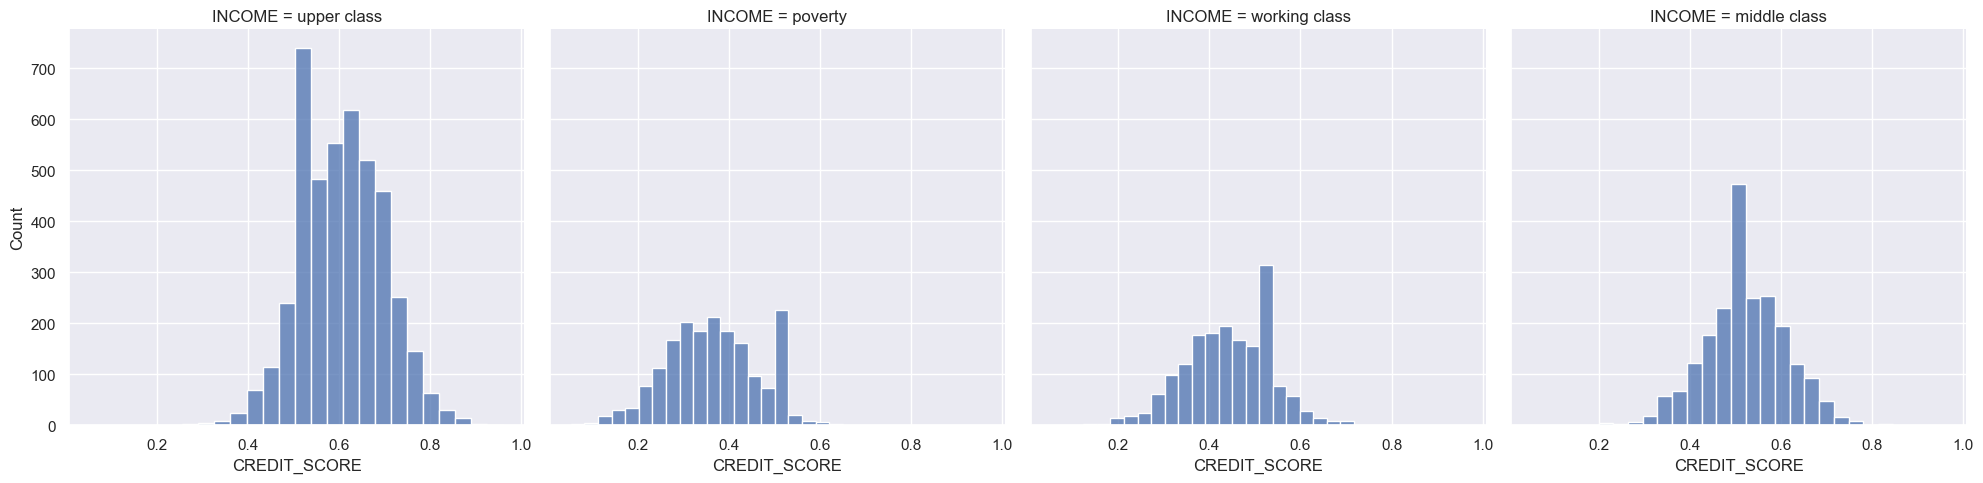

In [26]:
g = sns.FacetGrid(insurance, col='INCOME', height=5)
g.map(sns.histplot, 'CREDIT_SCORE', bins=20)

Vemos que existe sim uma grande diferença entre cada tipo de renda quando se trata do quão bom pagador o indivíduo é. Pessoas com renda alta são as que mais pagam em dia, enquanto pessoas com renda baixa são as que mais atrasam os pagamentos.

Podemos analisar isso mais estatisticamente pela tabela abaixo, que mostra a média de pontos de crédito de cada tipo de renda, além de outros dados estatísticos:

In [27]:
insurance.filter(['CREDIT_SCORE', 'INCOME']).groupby('INCOME').describe()

CREDIT_SCORE                                                    \
                     count      mean       std       min       25%       50%   
INCOME                                                                         
middle class        2138.0  0.522884  0.087848  0.199586  0.468203  0.515813   
poverty             1814.0  0.365135  0.100344  0.053358  0.293516  0.361944   
upper class         4336.0  0.604808  0.091803  0.255837  0.525999  0.605061   
working class       1712.0  0.441239  0.092086  0.123795  0.376898  0.446061   

                                   
                    75%       max  
INCOME                             
middle class   0.580780  0.844769  
poverty        0.436496  0.650351  
upper class    0.670612  0.960819  
working class  0.515813  0.717091

No caso da renda de pobreza, a média foi de 0.36 na pontuação de crédito, enquanto que na classe alta foi de 0.60. Vale notar também que a pontuação máxima de crédito da classe baixa foi de 0.65, quase a mesma pontuação **da média** da classe alta.

A média de pontos de crédito segue na ordem de renda: classe baixa < classe trabalhadora < classe média < classe alta.

#### Relação Renda x Filhos

Analisar a relação entre renda e filhos é interessante pois nos permite avaliar a Teoria Reformista (ou Marxista), que diz que a pobreza causa a superpopulação, ou seja, pessoas pobres tendem a ter mais filhos. Vamos analisar isso:

O parâmetro <font color='skyblue'>hue</font> relaciona o <font color='yellow'>INCOME</font> com <font color='yellow'>CHILDREN</font>, onde o eixo y representa a quantidade de <font color='yellow'>CHILDREN</font> para cada <font color='yellow'>INCOME</font>.

O parâmetro <font color='skyblue'>multiple</font> faz com que as barras fiquem organizadas uma ao lado da outra, seguindo a ordenação do eixo x.

O parâmetro <font color='skyblue'>shrink</font> faz com que as barras fiquem mais próximas umas das outras.

O parâmetro <font color='skyblue'>palette</font> muda a cor das barras.

Text(0.5, 1.0, 'Histograma da renda por filhos')

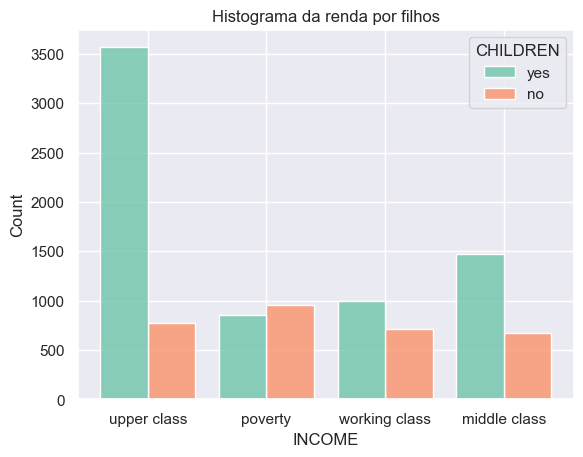

In [28]:
sns.histplot(data=insurance, x='INCOME', hue='CHILDREN', multiple='dodge', shrink=0.8, palette='Set2').set_title('Histograma da renda por filhos')

Pelo gráfico, podemos inferir que o tipo de renda que mais possui filhos é a classe alta, podendo ser devido ao fato de que pessoas dessa renda possuem mais condições de sustentar uma família maior. Por outro lado, a classe baixa é a que menos possui filhos, o que pode ser explicado pelo fato de que pessoas dessa renda possuem menos condições de sustentar uma família maior. Contrariando a Teoria Reformista, citada no começo.

*OBS:* Vale lembrar que apenas esses dados não são suficientes para afirmar que a Teoria Reformista é falsa, pois não analisamos outros fatores que podem influenciar na quantidade de filhos, como por exemplo a educação, a religião e a cultura. Mas esse não é o propósito dessa análise.

### Pontos de crédito

Para analisar os créditos individualmente usarei um histograma colorido, tanto por estética quanto pela melhor visualização dos dados:

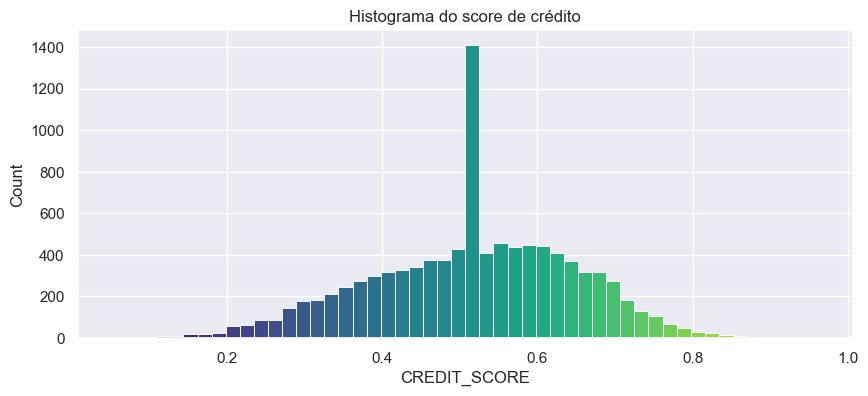

In [29]:
cm = sns.color_palette("viridis",50) #Cria uma paleta de cores com 50 tons de verde (baseado na paleta viridis)
plot = sns.histplot(x='CREDIT_SCORE',data=insurance, bins=50)
plot.figure.set_size_inches(10,4) #Define o tamanho do gráfico

for bin_,i in zip(plot.patches,cm): #Processo para colorir os bins
    bin_.set_facecolor(i)

plt.title("Histograma do score de crédito")
plt.show()

Podemos notar que a desvatadora maioria dos pontos de crédito se encontra próximo de 0.5, o que indica um pagador médio. Ademais, a quantidade de pontos de créditos maiores que 0.5 é maior do que a quantidade de pontos de créditos menores, o que indica que a maioria dos indivíduos são bons pagadores.

#### Relação Gênero x Pontos de crédito

Uma análise interessante a se fazer é a relação entre gênero e pontos de crédito. Vamos analisar se as mulheres são melhores pagadoras do que os homens:

CREDIT_SCORE                                                    \
              count      mean       std       min       25%       50%   
GENDER                                                                  
female       5010.0  0.525922  0.129773  0.053358  0.443756  0.515813   
male         4990.0  0.505663  0.130958  0.060867  0.417905  0.515813   

                            
             75%       max  
GENDER                      
female  0.617328  0.915883  
male    0.598641  0.960819

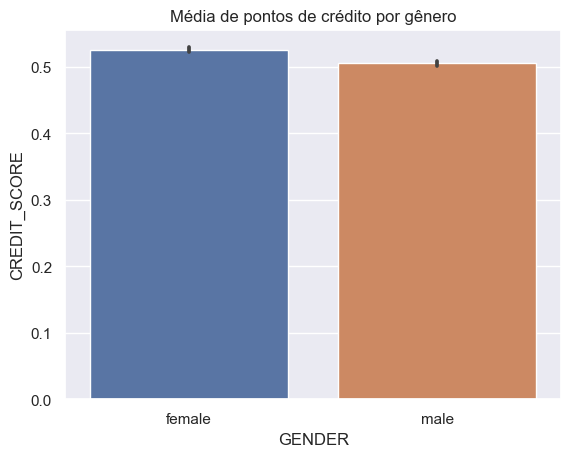

In [30]:
sns.barplot(data=insurance, x='GENDER', y='CREDIT_SCORE').set_title('Média de pontos de crédito por gênero')

insurance.filter(['CREDIT_SCORE', 'GENDER']).groupby('GENDER').describe()

Ao olhar a média dos scores dos gêneros, percebemos que as mulheres realmente pagam melhor do que os homens, o que pode ser explicado pelo fato de que as mulheres possuem mais cuidado com o dinheiro, e também por que elas possuem mais cuidado com o veículo (vimos isso em uma análise anterior).

### Propriedade do veículo

Para essa análise usaremos o parâmetro <font color='skyblue'>stat</font> para analisar a proporção de indivíduos que possuem ou não o veículo:

Text(0.5, 1.0, 'Proporção da propriedade de veículo')

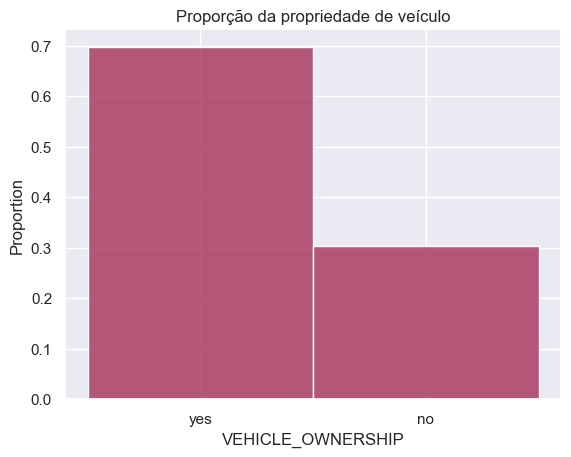

In [31]:
sns.histplot(data=insurance, x='VEHICLE_OWNERSHIP', stat='proportion', color='#a1254e').set_title('Proporção da propriedade de veículo')

Nos dados registrados no dataset, cerca de 65% dos indivíduos eram donos do veículo, enquanto que 35% não eram. 

### Ano do veículo

É importante análisarmos o ano do veículo, visto que as peças do veículo podem sofrer desgastes naturais com o tempo, aumentando a probabilidade de ocorrer um acidente no trânsito. Para isso, vamos observar o histograma dos anos dos veículos:

<Axes: xlabel='VEHICLE_YEAR', ylabel='Proportion'>

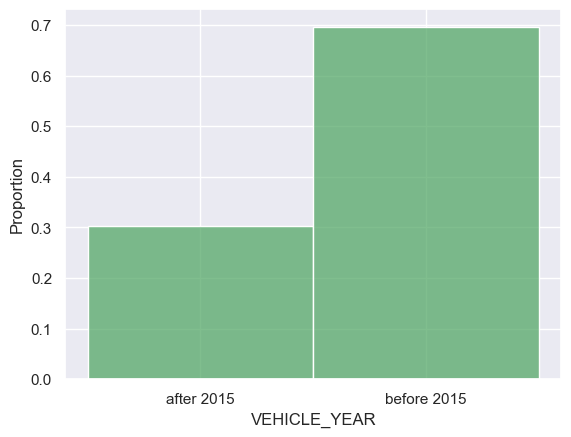

In [32]:
sns.histplot(data=insurance, x='VEHICLE_YEAR', stat='proportion', color='g')

Percebemos então pelo gráfico que a maioria dos pedidos de indenização foram feitos por veículos com mais tempo de uso, o que enfatiza o fato dos acidentes serem mais comuns em veículos mais velhos.

### Estado Civil

No dataset, o estado civil representa se o indivíduo é casado ou não. Podemos ver pelo gráfico abaixo que a distribuição é bem equilibrada, portanto não podemos inferir nenhuma informação olhando para a feature individualmente.

Text(0.5, 1.0, 'Histograma do estado civil')

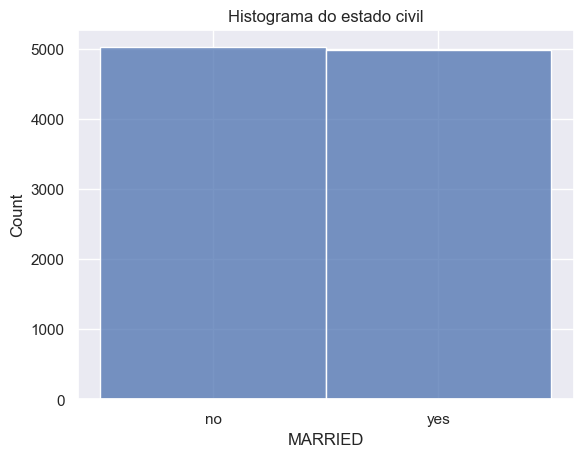

In [33]:
sns.histplot(insurance, x='MARRIED').set_title('Histograma do estado civil')

#### Relação Estado Civil x Filhos

Uma análise interessante para realizarmos é sobre a relação entre estado civil e filhos. Vamos analisar se pessoas casadas tendem a ter mais filhos do que pessoas não declaradas casadas:

<Axes: xlabel='MARRIED', ylabel='Count'>

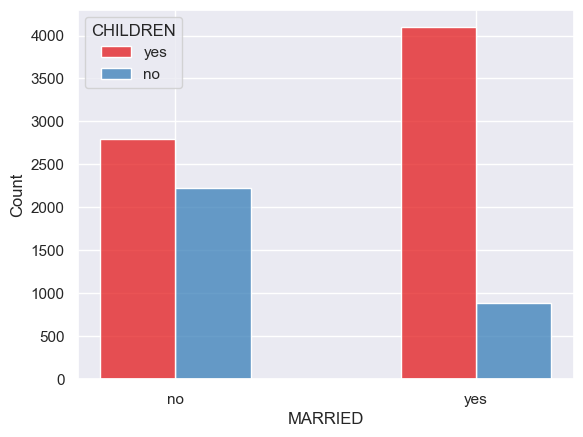

In [34]:
sns.histplot(data=insurance, x='MARRIED', hue='CHILDREN', multiple='dodge', shrink=0.5, palette='Set1')

Realmente, pessoas casadas são as que mais possuem filhos, porém vale notar também que pessoas não-casadas ainda assim possuem um número considerável de filhos. Isso pode ser explicado pelo fato de que pessoas não-casadas podem ter filhos e então se divorciar, ou então terem filhos sem se casar.

#### Relação Estado Civil x Renda

Podemos também analisar como o estado civil se comporta em cada renda. Para isso faremos o gráfico de barras abaixo:

<Axes: xlabel='MARRIED', ylabel='Count'>

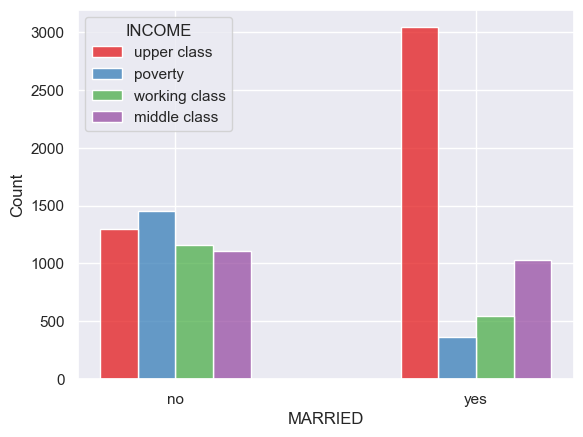

In [35]:
sns.histplot(data=insurance, x='MARRIED', hue='INCOME', multiple='dodge', shrink=0.5, palette='Set1')

Podemos ver que a classe alta é a que mais possui pessoas casadas, em contra partida, a classe baixa é a que menos possui pessoas casadas. Isso pode ser explicado pelo fato de que pessoas com renda alta possuem mais condições comprar/alugar uma casa, pagar contas, etc. Enquanto que pessoas com renda baixa possuem menos condições de realizar tais coisas.

### Filhos

Na análise individual dos filhos, podemos ver que a maioria dos indivíduos possui filhos, como mostra o gráfico abaixo:

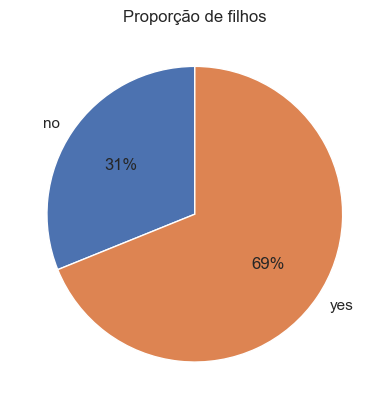

In [36]:
plt.pie(insurance.filter(['ID', 'CHILDREN']).groupby('CHILDREN').count()['ID'], labels=['no','yes'], autopct='%.0f%%', startangle=90)
plt.title('Proporção de filhos')
plt.show()

#### Relação Filhos x Acidentes Passados

Uma curiosidade interessante é se pessoas com filhos tendem a ter mais acidentes passados do que pessoas sem filhos. Vamos analisar isso:

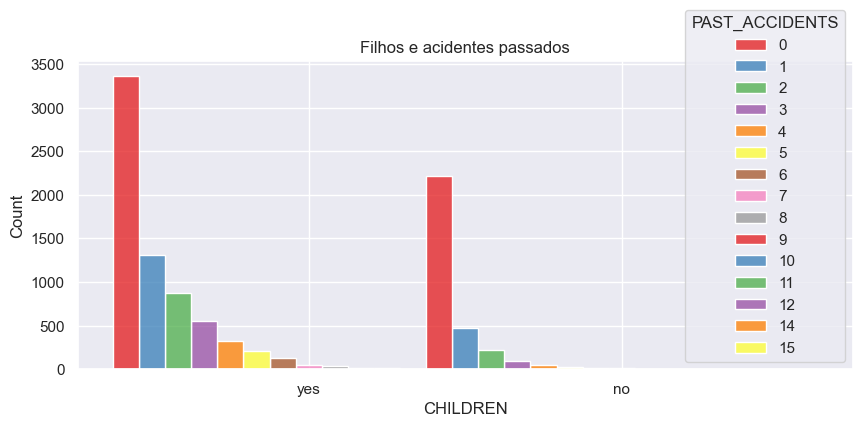

In [37]:
fg = sns.histplot(insurance, x='CHILDREN', hue='PAST_ACCIDENTS', multiple='dodge', shrink=1.25, palette='Set1')
#change fg size
fg.figure.set_size_inches(10,4)

plt.title("Filhos e acidentes passados")
plt.show()

Análisando o gráfico, percebemos que pessoas com filhos tendem a ter mais acidentes do que pessoas sem filhos. Isso pode ser causado pelo estresse que as pessoas com filhos possuem, pois elas precisam se preocupar com a educação dos filhos, saúde, alimentação, etc. Isso pode causar estresse e consequentemente acidentes.

### Localidade

Saber a localidade da maioria dos pedidos de indenização é importante para que a seguradora possa saber onde focar seus esforços para melhorar a qualidade do serviço prestado. Para isso, vamos analisar o gráfico abaixo:

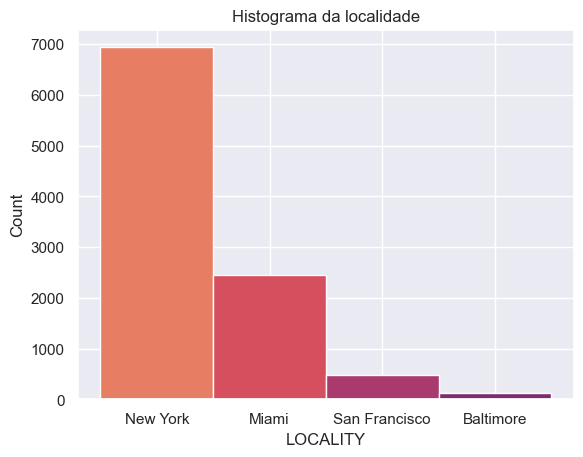

In [38]:
cm = sns.color_palette("flare",4)
    
plot = sns.histplot(x='LOCALITY',data=insurance, bins=4)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.title('Histograma da localidade')
plt.show()

Podemos ver que New York City é a cidade com mais pedidos de indenização. Isso pode ser explicado pelo fato de que a cidade é uma das mais populosas dos Estados Unidos, e portanto, possue mais indivíduos que podem ter um acidente de carro ou roubo.

#### Relação Localidade x Acidentes passados

Saber o local onde mais aconteceram acidentes é importante tanto para a seguradora quanto para pessoas interessadas em saber onde é mais seguro dirigir. Para isso, vamos analisar o gráfico abaixo:

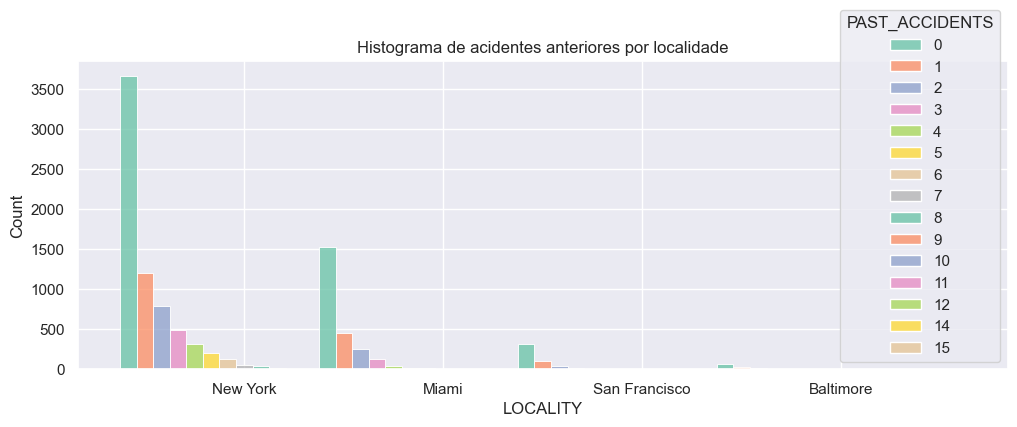

In [39]:
sns.histplot(data=insurance, x='LOCALITY', hue='PAST_ACCIDENTS', multiple='dodge', shrink=1.25, palette='Set2').set_title('Histograma de acidentes anteriores por localidade')
plt.gcf().set_size_inches(12,4) #Define o tamanho do gráfico

Podemos ver que novamente New York City se destaca, agora por ser a cidade com mais acidentes passados. Inclusive tendo mais acidentes do que a soma dos acidentes das outras cidades no dataset.

### Quilometragem anual percorrida

Saber qual a quilometragem anual percorrida entre os invdivíduos é importante para sabermos qual é a quilometragem anual em que os acidentes começam a ser frequentes. Para isso, vamos analisar o gráfico abaixo:

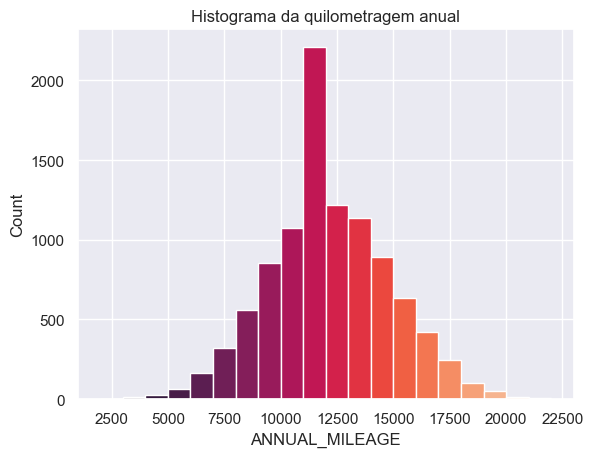

In [40]:
cm = sns.color_palette("rocket",20)
plot = sns.histplot(x='ANNUAL_MILEAGE',data=insurance, bins=20)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.title("Histograma da quilometragem anual")
plt.show()

Podemos descobrir qual é a moda dos dados, ou seja, o valor de quilometragem anual mais frequente, pelo método <font color='skyblue'>mode()</font>:

In [41]:
print("Moda da quilometragem anual: " + str(insurance['ANNUAL_MILEAGE'].mode()))

Moda da quilometragem anual: 0    11000.0
Name: ANNUAL_MILEAGE, dtype: float64


Como podemos ver, a moda é 11.000 km, ou seja, são mais frequentes pedidos de indenização por acidentes/roubos de veículos com essa quilometragem anual percorrida.

### Tipo de veículo

Já realizamos uma análise parcial dos tipos de veículos mais frequentes no nosso dataset anteriormente, mas agora vamos analisar a proporção de cada tipo de veículo:

Text(0.5, 1.0, 'Proporção do tipo de veículo')

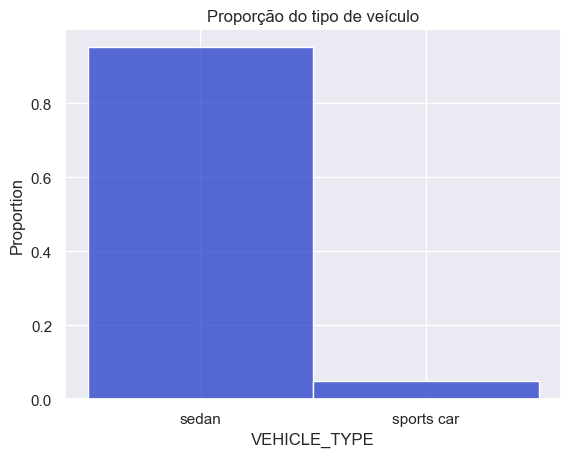

In [42]:
sns.histplot(insurance, x='VEHICLE_TYPE', stat='proportion', color='#233BC9').set_title('Proporção do tipo de veículo')

Pelo gráfico podemos verificar que os carros esportivos representam uma fração minúscula do total de veículos, enquanto que os carros familiares representam a grande maioria. Isso pois carros familiares são mais acessíveis e mais comuns do que carros esportivos, como dito anteriormente na análise.

#### Relação Tipo de veículo x Violações de velocidade

Será que só porque o carro é esportivo quer dizer que ele é mais propenso a violações de velocidade? Vamos analisar isso:

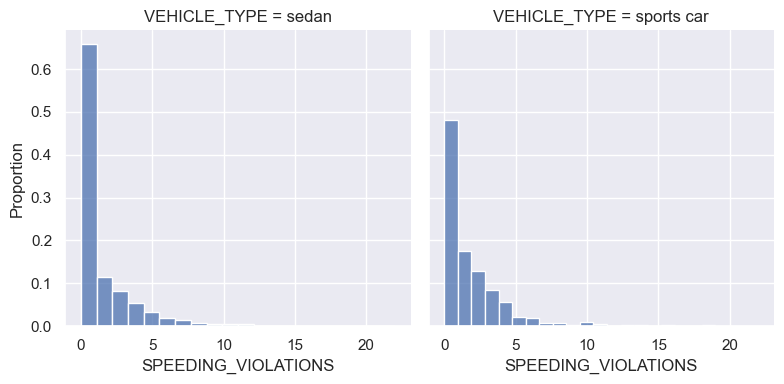

In [43]:
g = sns.FacetGrid(insurance, col='VEHICLE_TYPE', height=4)
g.map(sns.histplot, 'SPEEDING_VIOLATIONS', stat='proportion', bins=20)

Realmente, carros esportivos possuem proporcionalmente mais violações de velocidade do que carros familiares. Aliás, quem não quer correr com um carro esportivo? É muito mais divertido do que dirigir um carro familiar.

### DUIS

É comum pessoas cometerem acidentes de trânsito por estarem embriagadas, porém as seguradoras não cobrem os prejuízos de acidentes causados por embriaguez. Vamos analisar então o gráfico abaixo:

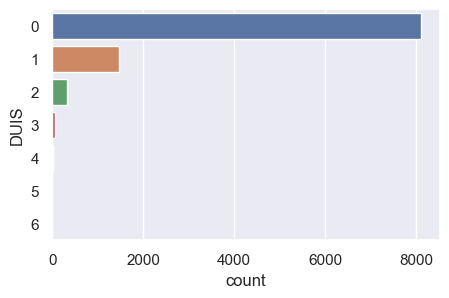

In [44]:
sns.countplot(insurance, y='DUIS')
#change the size of the graph
plt.gcf().set_size_inches(5,3)

Podemos também visualizar os dados pela tabela abaixo:

In [45]:
insurance.filter(['ID', 'DUIS']).groupby('DUIS').count()

,ID
DUIS,
0,8118
1,1470
2,331
3,68
4,10
5,2
6,1


Como podemos ver, a maioria dos indivíduos não possuem DUIS, talvez porque saibam que a seguradora não irá cobrir os prejuízos causados por acidentes de trânsito causados por embriaguez. Porém ainda assim foram registrados 2.392 casos de DUIS nos registros dos indivíduos, o que é um número considerável.

#### Relação DUIS x Acidentes passados

Uma análise a se fazer é se os acidentes passados dos indivíduos são acompanhados por DUIS. Vamos analisar isso:

Text(0.5, 1.0, 'Proporção de acidentes anteriores e infrações por DUI')

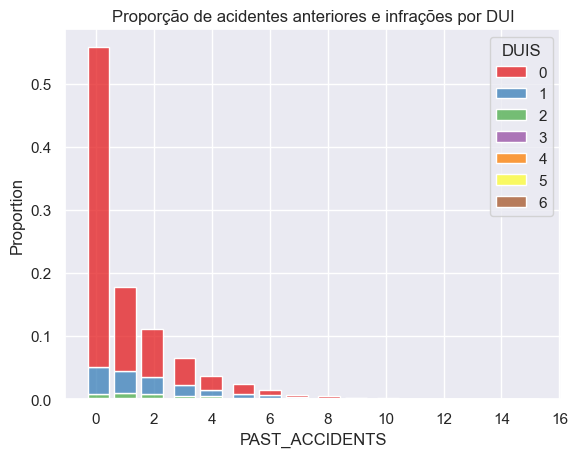

In [46]:
sns.histplot(insurance, x='PAST_ACCIDENTS', hue='DUIS', multiple='stack', stat='proportion', shrink=4, palette='Set1').set_title('Proporção de acidentes anteriores e infrações por DUI')

Podemos ver que grande parte dos acidentes passados não são acompanhados por DUIS, porém conforme o número de acidentes vai aumentando, a porporção acidentes/DUIS também aumenta. Isso significa que quanto mais acidentes o indivíduo teve, maior é a chance de algum deles ter sido por embriaguez.

## Análise de Outcome

### Pontos de Crédito

Text(0.5, 1.0, 'Proporção de score de crédito e resultado')

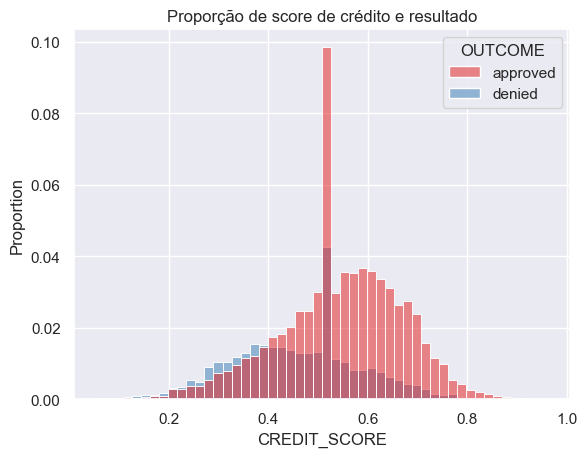

In [47]:
#make a graph that relates credit score with the outcome
sns.histplot(insurance, x='CREDIT_SCORE', hue='OUTCOME', alpha=0.5, stat='proportion', bins=50, palette='Set1').set_title('Proporção de score de crédito e resultado')

### Experiência do Motorista e Escolaridade

Text(0.5, 1.0, 'Aprovação de claim pela experiência de direção e escolaridade')

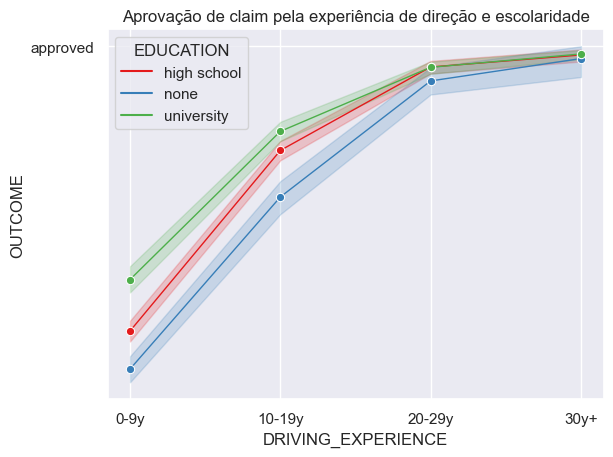

In [48]:
sns.lineplot(insurance, x='DRIVING_EXPERIENCE', y='OUTCOME', hue='EDUCATION', palette='Set1', lw=1, marker='o').set_title('Aprovação de claim pela experiência de direção e escolaridade')


Text(0.5, 1.0, 'Proporção de idade e resultado')

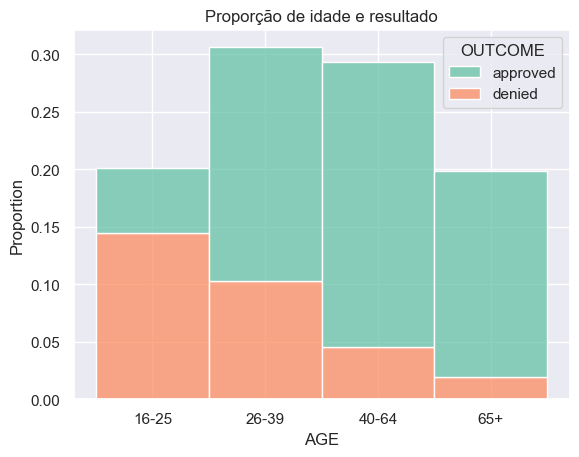

In [86]:
insurance.sort_values(by='AGE', inplace=True)
sns.histplot(insurance, x='AGE', hue='OUTCOME', multiple='stack', stat='proportion', palette='Set2').set_title('Proporção de idade e resultado')

<Axes: xlabel='AGE', ylabel='OUTCOME'>

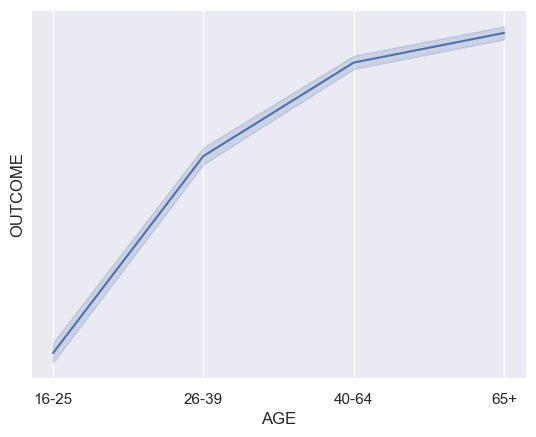

In [89]:
sns.lineplot(insurance, x='AGE', y='OUTCOME')